### 9.3. Convolution Neural Network For Image Classification

In [ ]:
pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.0)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import Model

In [ ]:
#importing mnist datase
mnist_data = tf.keras.datasets.fashion_mnist

#dividing data into training and test sets
(training_images, training_labels), (test_images, test_labels) = mnist_data .load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#scaling images
training_images, test_images = training_images/255.0, test_images/255.0

In [ ]:
print(training_images.shape)

(60000, 28, 28)


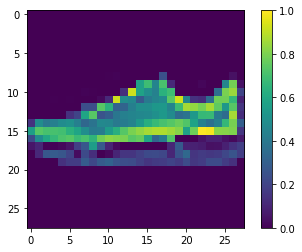

In [ ]:
#plotting image number 9 from test set
plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

0: T-shirt\top 

1: Trouser

2: Pullover 

3: Dress 

4: Coat 

5: Sandal 

6: Shirt 

7: Sneaker 

8: Bag 

9: Ankle boot 

In [ ]:
#converting data into the right shape
training_images = np.expand_dims(training_images, -1)
test_images = np.expand_dims(test_images, -1)
print(training_images.shape)

(60000, 28, 28, 1)


In [ ]:
#printing number of output classes
output_classes = len(set(training_labels))
print("Number of output classes is: ", output_classes)

Number of output classes is:  10


In [ ]:
training_images[0].shape

(28, 28, 1)

In [ ]:
#Developing the CNN model

input_layer = Input(shape = training_images[0].shape )
conv1 = Conv2D(32, (3,3), strides = 2, activation= 'relu')(input_layer)
maxpool1 = MaxPool2D(2, 2)(conv1)
conv2 = Conv2D(64, (3,3), strides = 2, activation= 'relu')(maxpool1)
#conv3 = Conv2D(128, (3,3), strides = 2, activation= 'relu')(conv2)
flat1 = Flatten()(conv2)
drop1 = Dropout(0.2)(flat1)
dense1 = Dense(512, activation = 'relu')(drop1)
drop2  = Dropout(0.2)(dense1)
output_layer = Dense(output_classes, activation= 'softmax')(drop2)

model = Model(input_layer, output_layer)

In [ ]:
#compiling the CNN model
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics =['accuracy'])


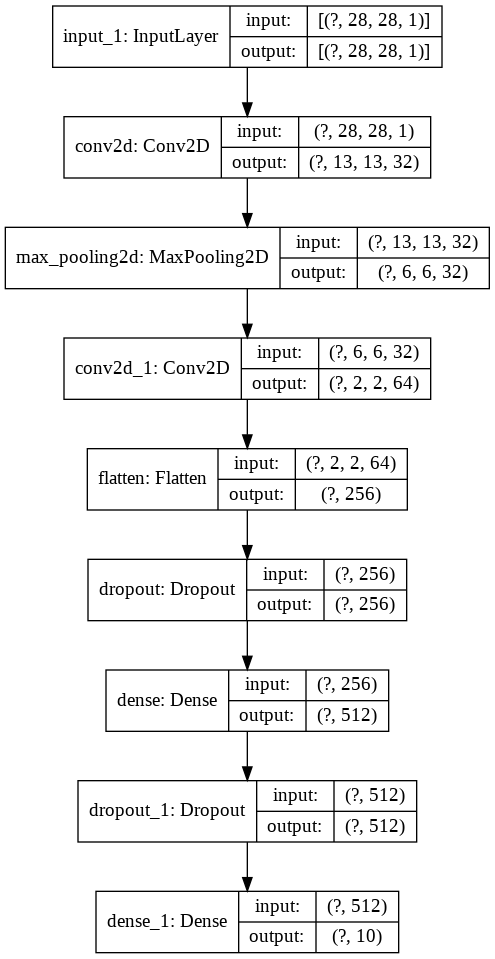

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [ ]:
#training the CNN model
model_history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels), verbose=1)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5878 - accuracy: 0.7848 - val_loss: 0.4480 - val_accuracy: 0.8343
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4283 - accuracy: 0.8417 - val_loss: 0.3950 - val_accuracy: 0.8578
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3840 - accuracy: 0.8567 - val_loss: 0.3722 - val_accuracy: 0.8654
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3542 - accuracy: 0.8686 - val_loss: 0.3470 - val_accuracy: 0.8693
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3326 - accuracy: 0.8750 - val_loss: 0.3429 - val_accuracy: 0.8727
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3200 - accuracy: 0.8804 - val_loss: 0.3310 - val_accuracy: 0.8776
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3062 - accuracy: 0.8848 - val_loss: 0.3447 - val_accuracy:

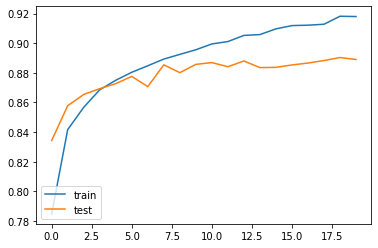

In [ ]:
#plotting accuracy
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(['train','test'], loc='lower left')

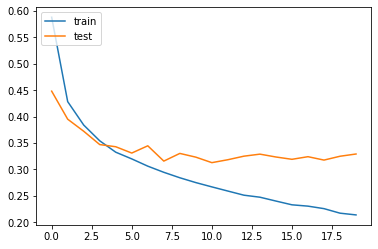

In [ ]:
#plotting loss
plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.legend(['train','test'], loc='upper left')

In [ ]:
#making predictions on a single image
output = model.predict(test_images)
prediction = np.argmax(output[9])
print(prediction)

7


## Exercise 9.1 

### Question 1

What should be the input shape of the input image to the  convolutional neural network?

A. Width, Height \
B. Height, Width \
C. Channels, Width, Height \
D. Width, Height, Channels \

Answer: D

### Question 2:

We say that a model is overfitting when:

A. Results on test set are better than train set \
B. Results on both test and train set are similar \
C. Results on training set are better than results on test set \
D. None of the above

Answer (C)


### Question 3

The relu activation function is used to introduce:

A. Linearity \
B. Non-linearity \
C. Quadraticity \
D. None of the above

Answer: B




## Exercise 9.2

Using the CFAR 10 image dataset, perform image classification to recognize images.

In [ ]:
cifar_dataset = tf.keras.datasets.cifar10

### Solution

In [ ]:
(training_images, training_labels), (test_images, test_labels) = cifar_dataset.load_data()

training_images, test_images = training_images/255.0, test_images/255.0

training_labels, test_labels = training_labels.flatten(), test_labels.flatten()
print(training_labels.shape)
print(training_images.shape)
output_classes = len(set(training_labels))
print("Number of output classes is: ", output_classes)
input_layer = Input(shape = training_images[0].shape )
conv1 = Conv2D(32, (3,3), strides = 2, activation= 'relu')(input_layer)
maxpool1 = MaxPool2D(2, 2)(conv1)
conv2 = Conv2D(64, (3,3), strides = 2, activation= 'relu')(maxpool1)
#conv3 = Conv2D(128, (3,3), strides = 2, activation= 'relu')(conv2)
flat1 = Flatten()(conv2)
drop1 = Dropout(0.2)(flat1)
dense1 = Dense(512, activation = 'relu')(drop1)
drop2  = Dropout(0.2)(dense1)
output_layer = Dense(output_classes, activation= 'softmax')(drop2)

model = Model(input_layer, output_layer)
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics =['accuracy'])
model_history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels), verbose=1)

170500096/170498071 [==============================] - 4s 0us/step
